In [9]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# Check current working directory
print("Current working directory:", os.getcwd())
print("Contents of current directory:", os.listdir('.'))

Current working directory: /home/c-hiy/direct-marketing-optimization/notebooks
Contents of current directory: ['sales_revenue.ipynb', 'eda.ipynb']


In [37]:
excel_path = os.path.join('..', 'data', 'raw', 'DataScientist_CaseStudy_Dataset.xlsx')
xls = pd.ExcelFile(excel_path)
datasets = {sheet: pd.read_excel(xls, sheet_name=sheet, engine="openpyxl") for sheet in xls.sheet_names}

In [ ]:
print("All sheet names:", list(datasets.keys()))
print("Available datasets:", datasets.keys())
raw_datasets = datasets.pop('Description')
# check the length of each dataset
for name, df in datasets.items():
    print(f"{name}: {len(df)} rows, {len(df.columns)} columns")

All sheet names: ['Description', 'Soc_Dem', 'Products_ActBalance', 'Inflow_Outflow', 'Sales_Revenues']
Available datasets: dict_keys(['Description', 'Soc_Dem', 'Products_ActBalance', 'Inflow_Outflow', 'Sales_Revenues'])
Soc_Dem: 1615 rows, 4 columns
Products_ActBalance: 1615 rows, 13 columns
Inflow_Outflow: 1587 rows, 15 columns
Sales_Revenues: 969 rows, 7 columns


In [47]:
for df in datasets.values():
    pd.set_option('display.max_columns', None)  # Show all columns
    print(df.columns.tolist())

['Client', 'Sex', 'Age', 'Tenure']
['Client', 'Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL', 'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL']
['Client', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']
['Client', 'Sale_MF', 'Sale_CC', 'Sale_CL', 'Revenue_MF', 'Revenue_CC', 'Revenue_CL']


Soc_Dem: 1615 unique clients
Products_ActBalance: 1615 unique clients
Inflow_Outflow: 1587 unique clients
Sales_Revenues: 969 unique clients

Total unique clients across all datasets: 1615

Client counts by dataset:
  Soc_Dem: 1615
  Products_ActBalance: 1615
  Inflow_Outflow: 1587
  Sales_Revenues: 969


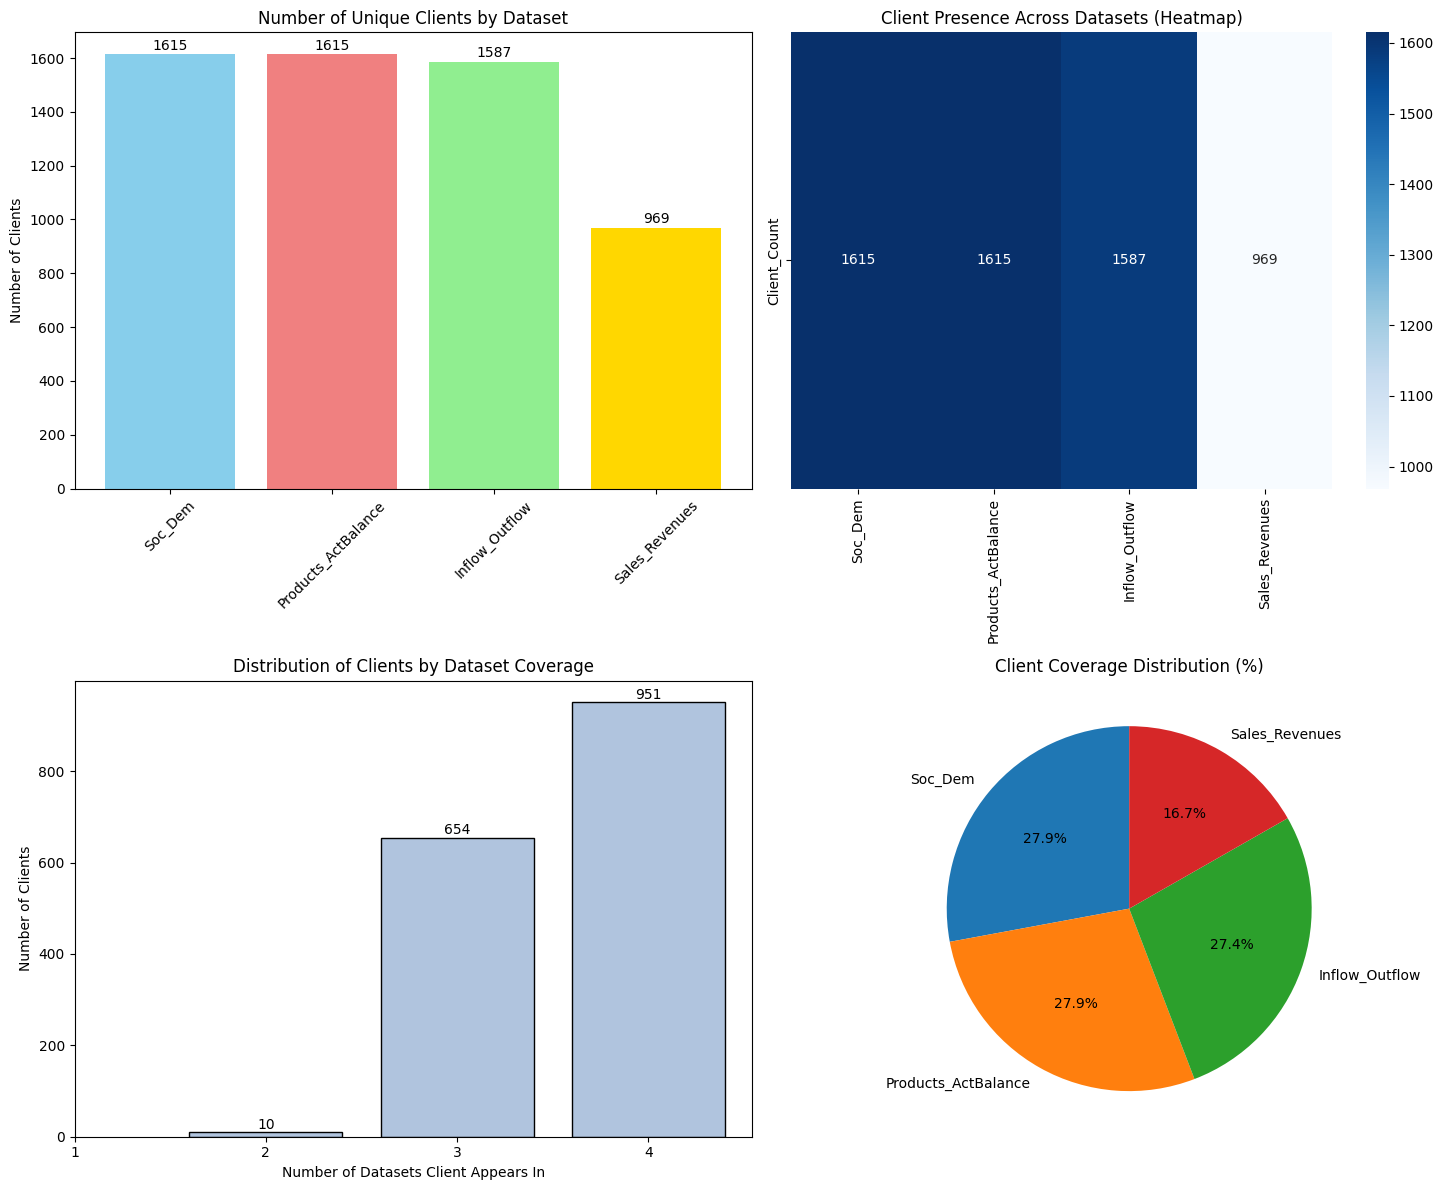


Detailed Coverage Analysis:
Clients appearing in all 4 datasets: 951
Clients appearing in only 1 dataset: 0
Coverage distribution:
2     10
3    654
4    951


In [39]:
# Create client coverage analysis
client_coverage = {}
all_clients = set()

# Get unique clients from each dataset
for name, df in datasets.items():
    if 'Client' in df.columns:
        unique_clients = set(df['Client'].unique())
        client_coverage[name] = unique_clients
        all_clients.update(unique_clients)
        print(f"{name}: {len(unique_clients)} unique clients")

print(f"\nTotal unique clients across all datasets: {len(all_clients)}")

# Check client presence across datasets
client_presence = pd.DataFrame(index=sorted(all_clients))
for name, clients in client_coverage.items():
    client_presence[name] = client_presence.index.isin(clients)

# Summary statistics
dataset_client_counts = {name: len(clients) for name, clients in client_coverage.items()}
print("\nClient counts by dataset:")
for name, count in dataset_client_counts.items():
    print(f"  {name}: {count}")

# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Bar chart of client counts by dataset
datasets_names = list(dataset_client_counts.keys())
client_counts = list(dataset_client_counts.values())
bars = ax1.bar(datasets_names, client_counts, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
ax1.set_title('Number of Unique Clients by Dataset')
ax1.set_ylabel('Number of Clients')
ax1.tick_params(axis='x', rotation=45)
# Add value labels on bars
for bar, count in zip(bars, client_counts):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             str(count), ha='center', va='bottom')

# 2. Heatmap of client presence across datasets
presence_summary = client_presence.sum(axis=0).to_frame('Client_Count').T
sns.heatmap(presence_summary, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Client Presence Across Datasets (Heatmap)')

# 3. Venn-like analysis: clients in how many datasets
clients_in_datasets = client_presence.sum(axis=1)
dataset_coverage_counts = clients_in_datasets.value_counts().sort_index()
ax3.bar(dataset_coverage_counts.index, dataset_coverage_counts.values, 
        color='lightsteelblue', edgecolor='black')
ax3.set_title('Distribution of Clients by Dataset Coverage')
ax3.set_xlabel('Number of Datasets Client Appears In')
ax3.set_ylabel('Number of Clients')
ax3.set_xticks(range(1, len(datasets) + 1))
# Add value labels
for i, v in enumerate(dataset_coverage_counts.values):
    ax3.text(dataset_coverage_counts.index[i], v + 1, str(v), ha='center', va='bottom')

# 4. Coverage percentage
total_clients = len(all_clients)
coverage_pct = [(count/total_clients)*100 for count in client_counts]
ax4.pie(coverage_pct, labels=datasets_names, autopct='%1.1f%%', startangle=90)
ax4.set_title('Client Coverage Distribution (%)')

plt.tight_layout()
plt.show()

# Detailed analysis
print(f"\nDetailed Coverage Analysis:")
print(f"Clients appearing in all {len(datasets)} datasets: {sum(clients_in_datasets == len(datasets))}")
print(f"Clients appearing in only 1 dataset: {sum(clients_in_datasets == 1)}")
print(f"Coverage distribution:")
print(dataset_coverage_counts.to_string())

In [40]:
# Calculate client coverage percentages
total_unique_clients = len(all_clients)
print(f"\n=== CLIENT COVERAGE ANALYSIS ===")
print(f"Total unique clients across all datasets: {total_unique_clients}")
print(f"\nClient coverage by dataset:")
print("-" * 50)

coverage_data = []
for name, clients in client_coverage.items():
    count = len(clients)
    coverage_pct = (count / total_unique_clients) * 100
    coverage_data.append({
        'Dataset': name,
        'Unique_Clients': count,
        'Coverage_Percentage': coverage_pct
    })
    print(f"{name:20}: {count:4d} clients ({coverage_pct:5.1f}%)")

# Create a coverage summary DataFrame
coverage_df = pd.DataFrame(coverage_data)
coverage_df = coverage_df.sort_values('Coverage_Percentage', ascending=False)

print(f"\n=== COVERAGE SUMMARY ===")
print(coverage_df.to_string(index=False, formatters={
    'Coverage_Percentage': '{:.1f}%'.format
}))

# Additional insights
print(f"\n=== KEY INSIGHTS ===")
print(f"• Highest coverage: {coverage_df.iloc[0]['Dataset']} ({coverage_df.iloc[0]['Coverage_Percentage']:.1f}%)")
print(f"• Lowest coverage: {coverage_df.iloc[-1]['Dataset']} ({coverage_df.iloc[-1]['Coverage_Percentage']:.1f}%)")
print(f"• Coverage gap: {coverage_df.iloc[0]['Coverage_Percentage'] - coverage_df.iloc[-1]['Coverage_Percentage']:.1f} percentage points")

# Check which clients appear in all datasets
clients_in_all_datasets = client_presence.sum(axis=1) == len(datasets)
complete_coverage_count = clients_in_all_datasets.sum()
complete_coverage_pct = (complete_coverage_count / total_unique_clients) * 100

print(f"• Clients appearing in ALL datasets: {complete_coverage_count} ({complete_coverage_pct:.1f}%)")


=== CLIENT COVERAGE ANALYSIS ===
Total unique clients across all datasets: 1615

Client coverage by dataset:
--------------------------------------------------
Soc_Dem             : 1615 clients (100.0%)
Products_ActBalance : 1615 clients (100.0%)
Inflow_Outflow      : 1587 clients ( 98.3%)
Sales_Revenues      :  969 clients ( 60.0%)

=== COVERAGE SUMMARY ===
            Dataset  Unique_Clients Coverage_Percentage
            Soc_Dem            1615              100.0%
Products_ActBalance            1615              100.0%
     Inflow_Outflow            1587               98.3%
     Sales_Revenues             969               60.0%

=== KEY INSIGHTS ===
• Highest coverage: Soc_Dem (100.0%)
• Lowest coverage: Sales_Revenues (60.0%)
• Coverage gap: 40.0 percentage points
• Clients appearing in ALL datasets: 951 (58.9%)


In [41]:
# Check for duplicate clients within each dataset
print("=== CLIENT UNIQUENESS CHECK ===")
print("Checking if 'Client' values are unique within each dataset:")
print("-" * 60)

uniqueness_summary = []

for name, df in datasets.items():
    if 'Client' in df.columns:
        total_rows = len(df)
        unique_clients = df['Client'].nunique()
        duplicates = total_rows - unique_clients
        is_unique = duplicates == 0
        
        uniqueness_summary.append({
            'Dataset': name,
            'Total_Rows': total_rows,
            'Unique_Clients': unique_clients,
            'Duplicates': duplicates,
            'Is_Unique': is_unique
        })
        
        status = "✓ UNIQUE" if is_unique else "✗ HAS DUPLICATES"
        print(f"{name:20}: {total_rows:4d} rows, {unique_clients:4d} unique clients, {duplicates:3d} duplicates - {status}")
        
        # Show duplicate clients if any
        if not is_unique:
            duplicate_clients = df[df['Client'].duplicated(keep=False)]['Client'].value_counts()
            print(f"  Duplicate clients in {name}:")
            for client, count in duplicate_clients.head(5).items():
                print(f"    Client {client}: appears {count} times")
            if len(duplicate_clients) > 5:
                print(f"    ... and {len(duplicate_clients) - 5} more duplicated clients")

# Create summary DataFrame
uniqueness_df = pd.DataFrame(uniqueness_summary)
print(f"\n=== UNIQUENESS SUMMARY ===")
print(uniqueness_df.to_string(index=False))

# Overall assessment
datasets_with_duplicates = sum(not row['Is_Unique'] for row in uniqueness_summary)
print(f"\n=== ASSESSMENT ===")
print(f"Datasets with unique clients: {len(uniqueness_summary) - datasets_with_duplicates}/{len(uniqueness_summary)}")
print(f"Datasets with duplicate clients: {datasets_with_duplicates}/{len(uniqueness_summary)}")

if datasets_with_duplicates > 0:
    print("\n⚠️  WARNING: Some datasets contain duplicate client entries!")
    print("   This may indicate multiple transactions/records per client.")
else:
    print("\n✓ All datasets have unique client entries.")

=== CLIENT UNIQUENESS CHECK ===
Checking if 'Client' values are unique within each dataset:
------------------------------------------------------------
Soc_Dem             : 1615 rows, 1615 unique clients,   0 duplicates - ✓ UNIQUE
Products_ActBalance : 1615 rows, 1615 unique clients,   0 duplicates - ✓ UNIQUE
Inflow_Outflow      : 1587 rows, 1587 unique clients,   0 duplicates - ✓ UNIQUE
Sales_Revenues      :  969 rows,  969 unique clients,   0 duplicates - ✓ UNIQUE

=== UNIQUENESS SUMMARY ===
            Dataset  Total_Rows  Unique_Clients  Duplicates  Is_Unique
            Soc_Dem        1615            1615           0       True
Products_ActBalance        1615            1615           0       True
     Inflow_Outflow        1587            1587           0       True
     Sales_Revenues         969             969           0       True

=== ASSESSMENT ===
Datasets with unique clients: 4/4
Datasets with duplicate clients: 0/4

✓ All datasets have unique client entries.


In [42]:
# Get clients from Sales_Revenues dataset
sales_clients = set(datasets['Sales_Revenues']['Client'].unique())
print(f"Clients in Sales_Revenues: {len(sales_clients)}")

# Create train and test datasets
datasets_train = {}
datasets_test = {}

for name, df in datasets.items():
    if 'Client' in df.columns:
        # Train: clients that exist in Sales_Revenues
        train_mask = df['Client'].isin(sales_clients)
        train_df = df[train_mask].copy()
        
        # Test: clients that do NOT exist in Sales_Revenues
        test_df = df[~train_mask].copy()
        
        # Store with new names
        datasets_train[f"{name}_train"] = train_df
        datasets_test[f"{name}_test"] = test_df
        
        print(f"{name}:")
        print(f"  Total rows: {len(df)}")
        print(f"  Train rows: {len(train_df)} ({len(train_df)/len(df)*100:.1f}%)")
        print(f"  Test rows: {len(test_df)} ({len(test_df)/len(df)*100:.1f}%)")
        print(f"  Train unique clients: {train_df['Client'].nunique()}")
        print(f"  Test unique clients: {test_df['Client'].nunique()}")
        print()

# Summary
print("=== TRAIN DATASETS ===")
for name, df in datasets_train.items():
    print(f"{name}: {len(df)} rows, {df['Client'].nunique()} unique clients")

print("\n=== TEST DATASETS ===")
for name, df in datasets_test.items():
    print(f"{name}: {len(df)} rows, {df['Client'].nunique()} unique clients")

# Verification
print(f"\n=== VERIFICATION ===")
print(f"Sales_Revenues clients: {len(sales_clients)}")
print(f"Sales_Revenues_train clients: {datasets_train['Sales_Revenues_train']['Client'].nunique()}")
print(f"Sales_Revenues_test clients: {datasets_test['Sales_Revenues_test']['Client'].nunique()}")
print(f"Should be equal: {len(sales_clients) == datasets_train['Sales_Revenues_train']['Client'].nunique()}")
print(f"Test should be 0: {datasets_test['Sales_Revenues_test']['Client'].nunique() == 0}")

Clients in Sales_Revenues: 969
Soc_Dem:
  Total rows: 1615
  Train rows: 969 (60.0%)
  Test rows: 646 (40.0%)
  Train unique clients: 969
  Test unique clients: 646

Products_ActBalance:
  Total rows: 1615
  Train rows: 969 (60.0%)
  Test rows: 646 (40.0%)
  Train unique clients: 969
  Test unique clients: 646

Inflow_Outflow:
  Total rows: 1587
  Train rows: 951 (59.9%)
  Test rows: 636 (40.1%)
  Train unique clients: 951
  Test unique clients: 636

Sales_Revenues:
  Total rows: 969
  Train rows: 969 (100.0%)
  Test rows: 0 (0.0%)
  Train unique clients: 969
  Test unique clients: 0

=== TRAIN DATASETS ===
Soc_Dem_train: 969 rows, 969 unique clients
Products_ActBalance_train: 969 rows, 969 unique clients
Inflow_Outflow_train: 951 rows, 951 unique clients
Sales_Revenues_train: 969 rows, 969 unique clients

=== TEST DATASETS ===
Soc_Dem_test: 646 rows, 646 unique clients
Products_ActBalance_test: 646 rows, 646 unique clients
Inflow_Outflow_test: 636 rows, 636 unique clients
Sales_Revenu

=== MISSING CLIENTS vs SALES PATTERN ANALYSIS ===
Missing clients in Inflow_Outflow: 18

Sales patterns for missing clients (18 clients):
     Client  Sale_MF  Sale_CC  Sale_CL
273     377        0        0        0
275    1269        0        0        0
335    1203        0        0        0
396    1199        0        1        0
425     663        0        0        0
575    1141        0        1        0
583     962        0        0        0
597     334        0        1        0
629     741        0        1        0
638     941        0        0        1

Sales patterns summary for missing clients:
Sale_MF    0
Sale_CC    5
Sale_CL    1
dtype: int64

Sales patterns summary for clients with Inflow_Outflow data:
Sale_MF    193
Sale_CC    237
Sale_CL    289
dtype: int64

=== SALES PATTERN COMPARISON ===
Missing clients - Sales breakdown:
  Sale_MF: 0/18 (0.0%)
  Sale_CC: 5/18 (27.8%)
  Sale_CL: 1/18 (5.6%)

Present clients - Sales breakdown:
  Sale_MF: 193/951 (20.3%)
  Sale_CC: 237

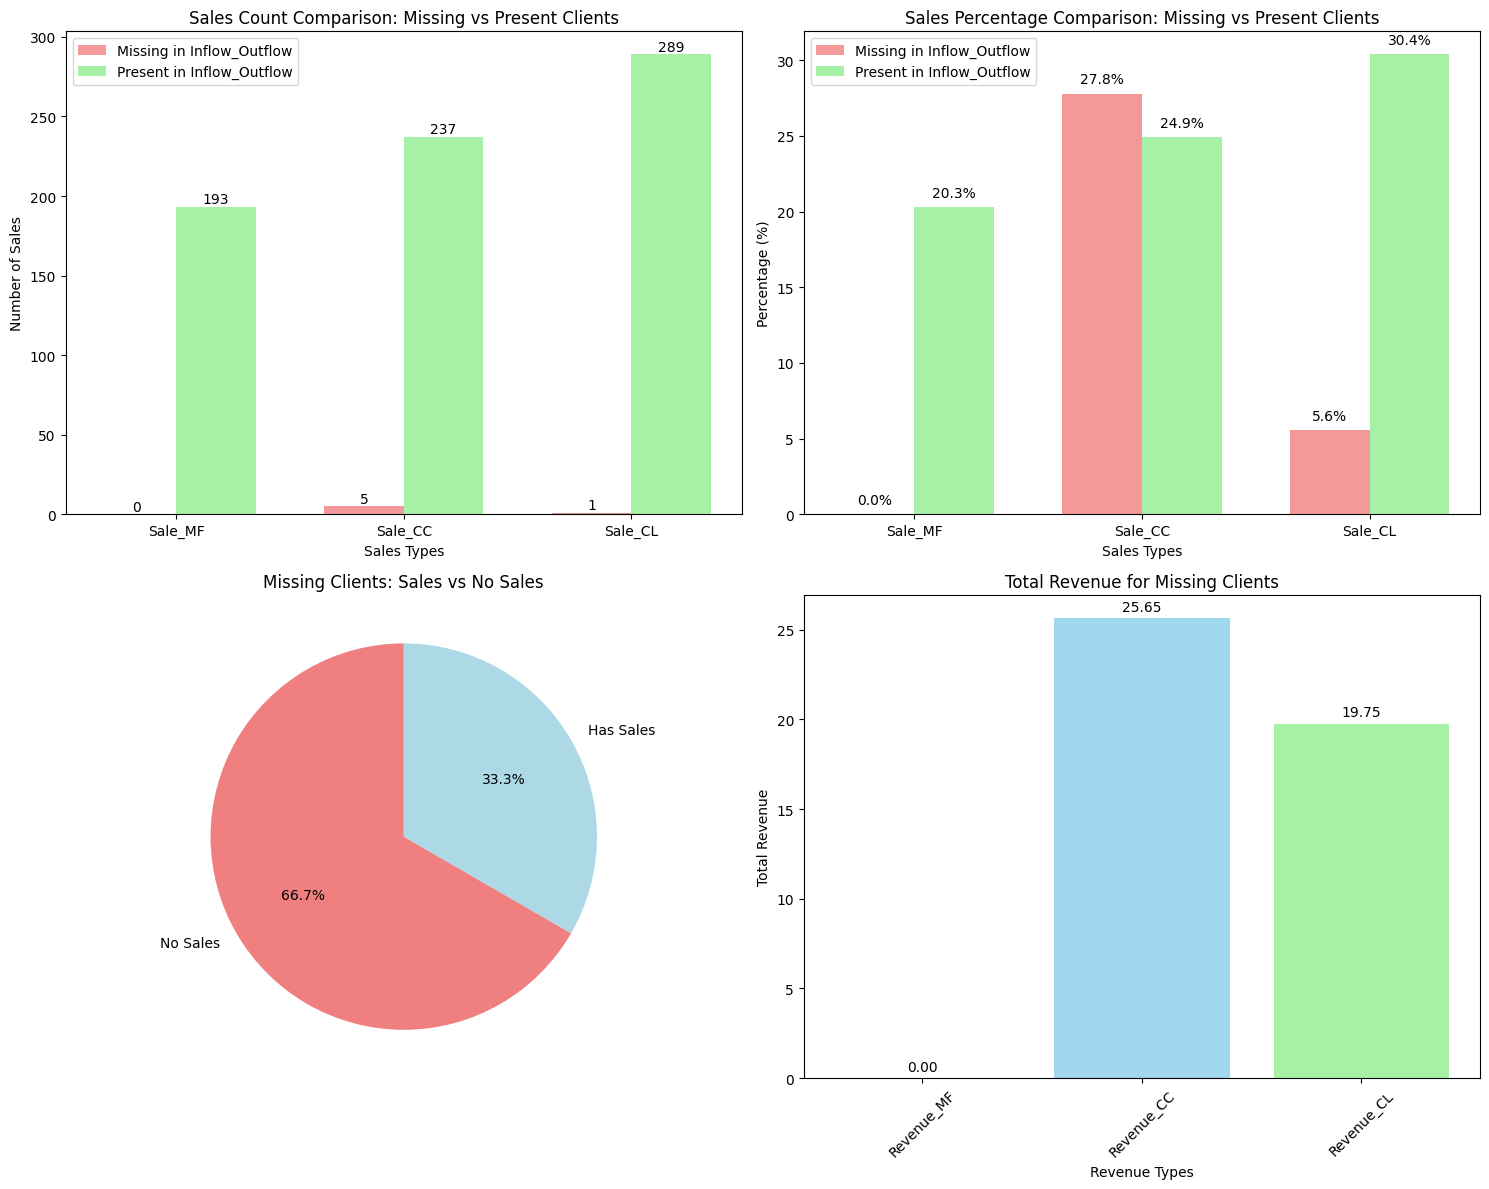


=== STATISTICAL ANALYSIS ===

Sale_MF Analysis:
  Missing clients with sale: 0/18 (0.0%)
  Present clients with sale: 193/951 (20.3%)
  Chi-square statistic: 3.3779
  P-value: 0.0661
  Significant difference: No

Sale_CC Analysis:
  Missing clients with sale: 5/18 (27.8%)
  Present clients with sale: 237/951 (24.9%)
  Chi-square statistic: 0.0000
  P-value: 0.9980
  Significant difference: No

Sale_CL Analysis:
  Missing clients with sale: 1/18 (5.6%)
  Present clients with sale: 289/951 (30.4%)
  Chi-square statistic: 4.0783
  P-value: 0.0434
  Significant difference: Yes


In [44]:
# Analyze relationship between missing Inflow_Outflow clients and their sales patterns
print("=== MISSING CLIENTS vs SALES PATTERN ANALYSIS ===")

# Get the missing clients from Sales_Revenues
missing_clients_list = list(missing_clients)
print(f"Missing clients in Inflow_Outflow: {len(missing_clients_list)}")

# Get sales data for missing vs present clients
sales_df = datasets['Sales_Revenues']
missing_sales = sales_df[sales_df['Client'].isin(missing_clients_list)]
present_sales = sales_df[sales_df['Client'].isin(inflow_train_clients)]

print(f"\nSales patterns for missing clients ({len(missing_sales)} clients):")
print(missing_sales[['Client', 'Sale_MF', 'Sale_CC', 'Sale_CL']].head(10))

print(f"\nSales patterns summary for missing clients:")
missing_summary = missing_sales[['Sale_MF', 'Sale_CC', 'Sale_CL']].sum()
print(missing_summary)

print(f"\nSales patterns summary for clients with Inflow_Outflow data:")
present_summary = present_sales[['Sale_MF', 'Sale_CC', 'Sale_CL']].sum()
print(present_summary)

# Calculate percentages
print(f"\n=== SALES PATTERN COMPARISON ===")
print(f"Missing clients - Sales breakdown:")
total_missing = len(missing_sales)
for col in ['Sale_MF', 'Sale_CC', 'Sale_CL']:
    count = missing_sales[col].sum()
    pct = (count / total_missing) * 100
    print(f"  {col}: {count}/{total_missing} ({pct:.1f}%)")

print(f"\nPresent clients - Sales breakdown:")
total_present = len(present_sales)
for col in ['Sale_MF', 'Sale_CC', 'Sale_CL']:
    count = present_sales[col].sum()
    pct = (count / total_present) * 100
    print(f"  {col}: {count}/{total_present} ({pct:.1f}%)")

# Check if missing clients have no sales at all
missing_no_sales = missing_sales[(missing_sales['Sale_MF'] == 0) & 
                                (missing_sales['Sale_CC'] == 0) & 
                                (missing_sales['Sale_CL'] == 0)]
print(f"\nMissing clients with NO sales at all: {len(missing_no_sales)}/{len(missing_sales)} ({len(missing_no_sales)/len(missing_sales)*100:.1f}%)")

# Visualize the comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Sales pattern comparison - bar chart
sales_cols = ['Sale_MF', 'Sale_CC', 'Sale_CL']
missing_counts = [missing_sales[col].sum() for col in sales_cols]
present_counts = [present_sales[col].sum() for col in sales_cols]

x = np.arange(len(sales_cols))
width = 0.35

bars1 = ax1.bar(x - width/2, missing_counts, width, label='Missing in Inflow_Outflow', color='lightcoral', alpha=0.8)
bars2 = ax1.bar(x + width/2, present_counts, width, label='Present in Inflow_Outflow', color='lightgreen', alpha=0.8)

ax1.set_xlabel('Sales Types')
ax1.set_ylabel('Number of Sales')
ax1.set_title('Sales Count Comparison: Missing vs Present Clients')
ax1.set_xticks(x)
ax1.set_xticklabels(sales_cols)
ax1.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom')

# 2. Percentage comparison
missing_pcts = [(missing_sales[col].sum() / total_missing) * 100 for col in sales_cols]
present_pcts = [(present_sales[col].sum() / total_present) * 100 for col in sales_cols]

bars3 = ax2.bar(x - width/2, missing_pcts, width, label='Missing in Inflow_Outflow', color='lightcoral', alpha=0.8)
bars4 = ax2.bar(x + width/2, present_pcts, width, label='Present in Inflow_Outflow', color='lightgreen', alpha=0.8)

ax2.set_xlabel('Sales Types')
ax2.set_ylabel('Percentage (%)')
ax2.set_title('Sales Percentage Comparison: Missing vs Present Clients')
ax2.set_xticks(x)
ax2.set_xticklabels(sales_cols)
ax2.legend()

# Add percentage labels
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}%', ha='center', va='bottom')

# 3. Client distribution - pie chart for missing clients
missing_sales_dist = {
    'No Sales': len(missing_no_sales),
    'Has Sales': len(missing_sales) - len(missing_no_sales)
}
ax3.pie(missing_sales_dist.values(), labels=missing_sales_dist.keys(), 
        autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
ax3.set_title('Missing Clients: Sales vs No Sales')

# 4. Revenue comparison for missing clients
revenue_cols = ['Revenue_MF', 'Revenue_CC', 'Revenue_CL']
missing_revenues = [missing_sales[col].sum() for col in revenue_cols]

ax4.bar(revenue_cols, missing_revenues, color=['gold', 'skyblue', 'lightgreen'], alpha=0.8)
ax4.set_xlabel('Revenue Types')
ax4.set_ylabel('Total Revenue')
ax4.set_title('Total Revenue for Missing Clients')
ax4.tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(missing_revenues):
    ax4.text(i, v + max(missing_revenues)*0.01, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Statistical test
from scipy.stats import chi2_contingency

print(f"\n=== STATISTICAL ANALYSIS ===")
# Create contingency table for each sales type
for col in ['Sale_MF', 'Sale_CC', 'Sale_CL']:
    # Missing clients
    missing_has_sale = missing_sales[col].sum()
    missing_no_sale = len(missing_sales) - missing_has_sale
    
    # Present clients  
    present_has_sale = present_sales[col].sum()
    present_no_sale = len(present_sales) - present_has_sale
    
    # Contingency table
    contingency_table = [[missing_has_sale, missing_no_sale],
                        [present_has_sale, present_no_sale]]
    
    # Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\n{col} Analysis:")
    print(f"  Missing clients with sale: {missing_has_sale}/{len(missing_sales)} ({missing_has_sale/len(missing_sales)*100:.1f}%)")
    print(f"  Present clients with sale: {present_has_sale}/{len(present_sales)} ({present_has_sale/len(present_sales)*100:.1f}%)")
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  P-value: {p_value:.4f}")
    print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

## **1. Business Logic - Account Activity Requirements**

The most likely explanation is that **Inflow_Outflow data is only collected for clients with active transaction accounts**. Notice that:

- **66.7% of missing clients have NO sales at all** (12/18 clients)
- Missing clients show very low sales activity overall
- Inflow_Outflow tracks transaction volumes and counts, which require active accounts

**Theory**: Clients without active checking accounts (CA) or savings accounts (SA) wouldn't generate inflow/outflow data.

## **2. Product-Specific Data Collection**

The missing clients have:
- **0% Mutual Fund (MF) sales** vs 20.3% for present clients
- **Lower Credit Card (CC) sales**: 27.8% vs 24.9% 
- **Much lower Consumer Loan (CL) sales**: 5.6% vs 30.4%

**Theory**: Inflow_Outflow data might only be tracked for clients with specific product relationships, particularly those with:
- Mutual fund investments (requiring transaction tracking)
- Active lending relationships
- Regular banking activity

## **3. Data Collection Timing**

**Theory**: These could be:
- **New clients** who haven't had time to generate transaction history
- **Dormant clients** whose accounts became inactive
- **Product-only clients** (e.g., only credit cards, no deposit accounts)

## **4. Regulatory or Technical Constraints**

**Theory**: 
- **Privacy regulations** might limit transaction data collection for certain client types
- **System limitations** where some account types don't feed into the transaction tracking system
- **Data retention policies** where inactive accounts lose historical transaction data

## **5. Account Type Segmentation**

Looking at the product columns, the missing clients likely represent:
- **Non-transactional clients** (only holding static products)
- **External product holders** (products that don't require internal bank accounts)
- **Dormant account holders** (accounts exist but no recent activity)

## **Conclusion**

This is **most likely NOT random** but follows **business logic**. The strong correlation between missing Inflow_Outflow data and:
1. Zero mutual fund sales (most transaction-intensive product)
2. Lower overall product penetration
3. High percentage with no sales at all

...suggests that Inflow_Outflow data collection is **conditional on having active transactional banking relationships**. This is a common pattern in banking where transaction analytics are only meaningful for clients with active deposit/transaction accounts.

=== SURVIVORSHIP BIAS ANALYSIS: Missing Inflow Clients ===
Checking if we're excluding high-value CC/CL revenue clients by ignoring missing inflow data
--------------------------------------------------------------------------------
Missing inflow clients: 18
Present inflow clients: 951

=== CC & CL REVENUE ANALYSIS ===
CC Revenue Comparison:
  Missing clients - Total: $25.65, Mean: $1.42, Max: $8.93
  Present clients - Total: $2603.08, Mean: $2.74, Max: $407.96

CL Revenue Comparison:
  Missing clients - Total: $19.75, Mean: $1.10, Max: $19.75
  Present clients - Total: $3472.74, Mean: $3.65, Max: $133.28

=== HIGH-VALUE CLIENT IDENTIFICATION ===
High-value thresholds (75th percentile of present clients):
  CC Revenue: $0.00
  CL Revenue: $4.88

High-value clients among MISSING inflow data:
  High CC revenue: 18/18 (100.0%)
  High CL revenue: 1/18 (5.6%)
  High CC OR CL revenue: 18/18 (100.0%)

High-value clients among PRESENT inflow data:
  High CC revenue: 951/951 (100.0%)
  High CL

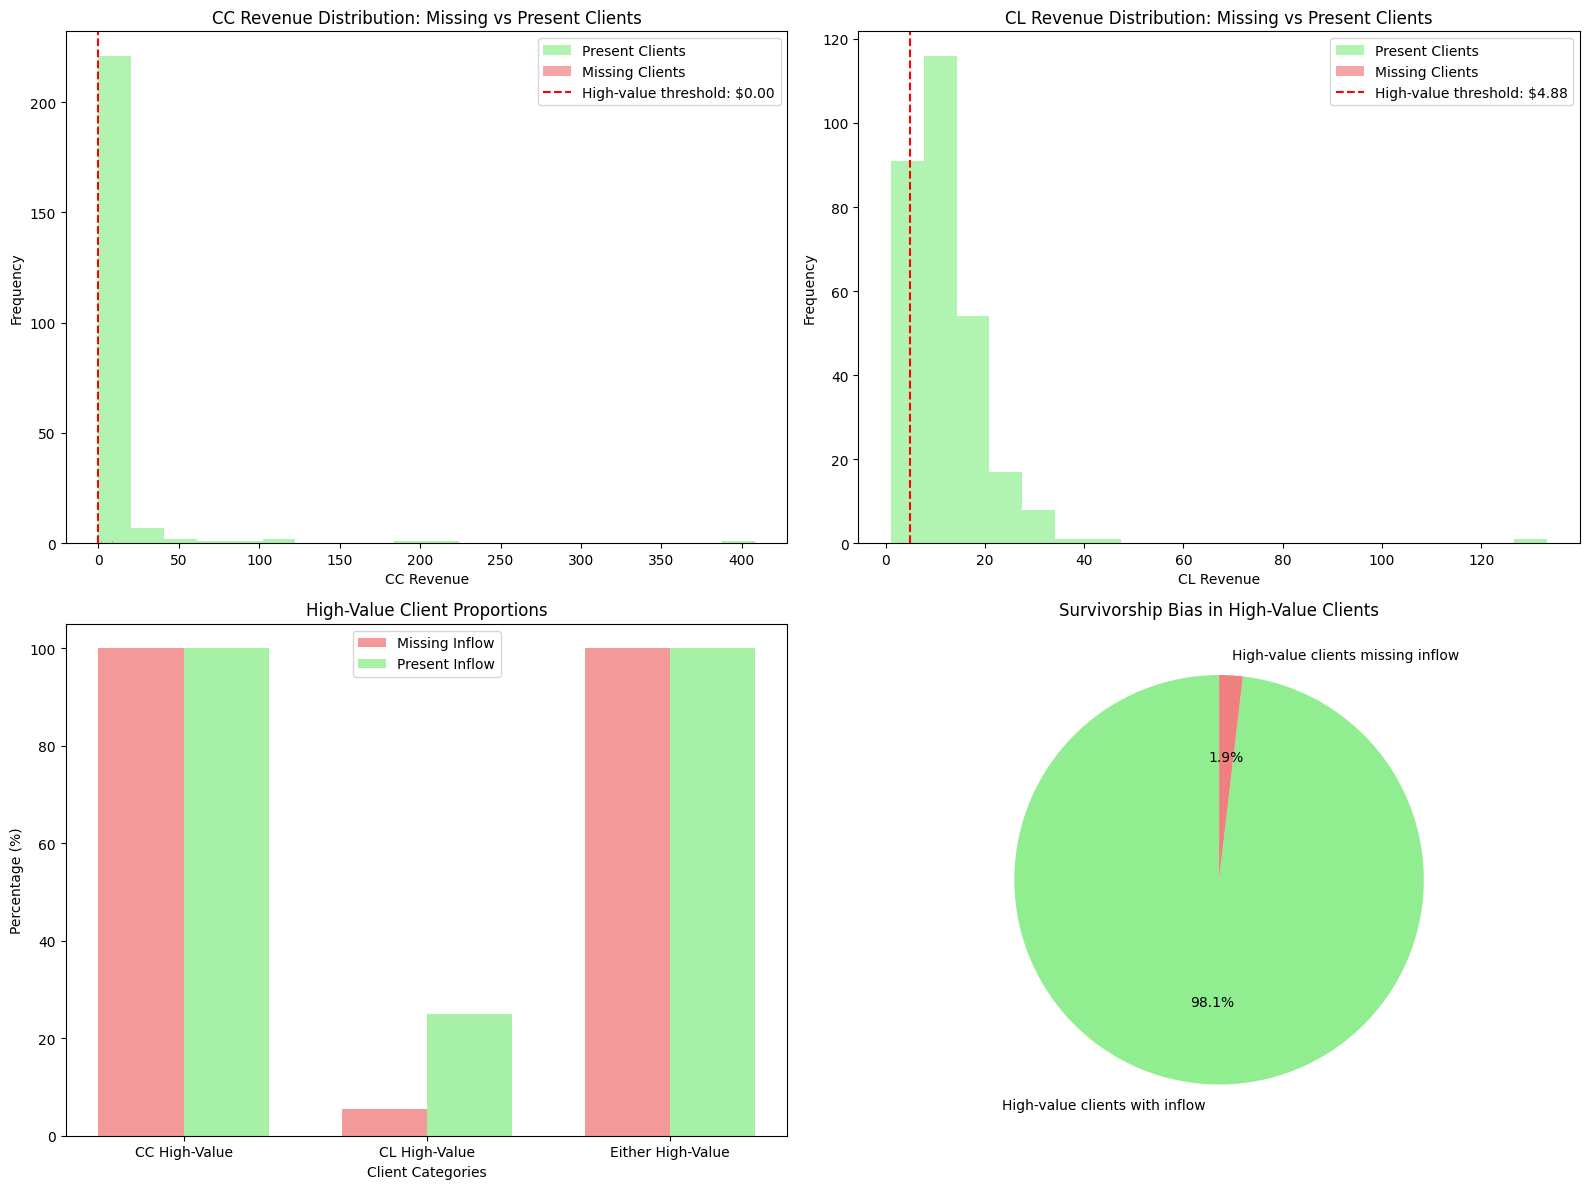


=== FINAL SURVIVORSHIP BIAS ASSESSMENT ===
✅ LOW BIAS RISK: Only 1.9% of high-value clients missing inflow data
   RECOMMENDATION: Safe to exclude, minimal impact on high-value targets

Revenue Impact:
  Lost high-value revenue: $45.40
  Total CC+CL revenue: $6121.22
  Revenue impact: 0.74% of total CC+CL revenue


In [48]:
# HIGH-VALUE TARGET SURVIVORSHIP BIAS ANALYSIS
print("=== SURVIVORSHIP BIAS ANALYSIS: Missing Inflow Clients ===")
print("Checking if we're excluding high-value CC/CL revenue clients by ignoring missing inflow data")
print("-" * 80)

# Get missing clients and their revenue data
missing_clients_list = list(missing_clients)
sales_df = datasets['Sales_Revenues']
missing_sales = sales_df[sales_df['Client'].isin(missing_clients_list)]
present_sales = sales_df[sales_df['Client'].isin(inflow_train_clients)]

print(f"Missing inflow clients: {len(missing_sales)}")
print(f"Present inflow clients: {len(present_sales)}")

# 1. REVENUE ANALYSIS - Focus on CC and CL
print(f"\n=== CC & CL REVENUE ANALYSIS ===")

# Calculate revenue statistics for missing vs present clients
missing_cc_revenue = missing_sales['Revenue_CC']
missing_cl_revenue = missing_sales['Revenue_CL']
present_cc_revenue = present_sales['Revenue_CC']
present_cl_revenue = present_sales['Revenue_CL']

print(f"CC Revenue Comparison:")
print(f"  Missing clients - Total: ${missing_cc_revenue.sum():.2f}, Mean: ${missing_cc_revenue.mean():.2f}, Max: ${missing_cc_revenue.max():.2f}")
print(f"  Present clients - Total: ${present_cc_revenue.sum():.2f}, Mean: ${present_cc_revenue.mean():.2f}, Max: ${present_cc_revenue.max():.2f}")

print(f"\nCL Revenue Comparison:")
print(f"  Missing clients - Total: ${missing_cl_revenue.sum():.2f}, Mean: ${missing_cl_revenue.mean():.2f}, Max: ${missing_cl_revenue.max():.2f}")
print(f"  Present clients - Total: ${present_cl_revenue.sum():.2f}, Mean: ${present_cl_revenue.mean():.2f}, Max: ${present_cl_revenue.max():.2f}")

# 2. HIGH-VALUE CLIENT IDENTIFICATION
print(f"\n=== HIGH-VALUE CLIENT IDENTIFICATION ===")

# Define high-value thresholds (you can adjust these)
cc_high_value_threshold = present_cc_revenue.quantile(0.75)  # Top 25%
cl_high_value_threshold = present_cl_revenue.quantile(0.75)  # Top 25%

print(f"High-value thresholds (75th percentile of present clients):")
print(f"  CC Revenue: ${cc_high_value_threshold:.2f}")
print(f"  CL Revenue: ${cl_high_value_threshold:.2f}")

# Identify high-value clients in missing group
missing_high_cc = missing_sales[missing_sales['Revenue_CC'] >= cc_high_value_threshold]
missing_high_cl = missing_sales[missing_sales['Revenue_CL'] >= cl_high_value_threshold]
missing_high_either = missing_sales[(missing_sales['Revenue_CC'] >= cc_high_value_threshold) | 
                                   (missing_sales['Revenue_CL'] >= cl_high_value_threshold)]

print(f"\nHigh-value clients among MISSING inflow data:")
print(f"  High CC revenue: {len(missing_high_cc)}/{len(missing_sales)} ({len(missing_high_cc)/len(missing_sales)*100:.1f}%)")
print(f"  High CL revenue: {len(missing_high_cl)}/{len(missing_sales)} ({len(missing_high_cl)/len(missing_sales)*100:.1f}%)")
print(f"  High CC OR CL revenue: {len(missing_high_either)}/{len(missing_sales)} ({len(missing_high_either)/len(missing_sales)*100:.1f}%)")

# Compare with present clients
present_high_cc = present_sales[present_sales['Revenue_CC'] >= cc_high_value_threshold]
present_high_cl = present_sales[present_sales['Revenue_CL'] >= cl_high_value_threshold]
present_high_either = present_sales[(present_sales['Revenue_CC'] >= cc_high_value_threshold) | 
                                   (present_sales['Revenue_CL'] >= cl_high_value_threshold)]

print(f"\nHigh-value clients among PRESENT inflow data:")
print(f"  High CC revenue: {len(present_high_cc)}/{len(present_sales)} ({len(present_high_cc)/len(present_sales)*100:.1f}%)")
print(f"  High CL revenue: {len(present_high_cl)}/{len(present_sales)} ({len(present_high_cl)/len(present_sales)*100:.1f}%)")
print(f"  High CC OR CL revenue: {len(present_high_either)}/{len(present_sales)} ({len(present_high_either)/len(present_sales)*100:.1f}%)")

# 3. SURVIVORSHIP BIAS ASSESSMENT
print(f"\n=== SURVIVORSHIP BIAS ASSESSMENT ===")

total_high_cc = len(missing_high_cc) + len(present_high_cc)
total_high_cl = len(missing_high_cl) + len(present_high_cl)
total_high_either = len(missing_high_either) + len(present_high_either)

if total_high_cc > 0:
    cc_bias_pct = (len(missing_high_cc) / total_high_cc) * 100
    print(f"CC Revenue Bias: {len(missing_high_cc)}/{total_high_cc} ({cc_bias_pct:.1f}%) of high-value CC clients missing inflow data")
else:
    cc_bias_pct = 0
    print(f"CC Revenue Bias: No high-value CC clients found")

if total_high_cl > 0:
    cl_bias_pct = (len(missing_high_cl) / total_high_cl) * 100
    print(f"CL Revenue Bias: {len(missing_high_cl)}/{total_high_cl} ({cl_bias_pct:.1f}%) of high-value CL clients missing inflow data")
else:
    cl_bias_pct = 0
    print(f"CL Revenue Bias: No high-value CL clients found")

if total_high_either > 0:
    overall_bias_pct = (len(missing_high_either) / total_high_either) * 100
    print(f"Overall Bias: {len(missing_high_either)}/{total_high_either} ({overall_bias_pct:.1f}%) of high-value clients missing inflow data")
else:
    overall_bias_pct = 0

# 4. DETAILED HIGH-VALUE MISSING CLIENTS
if len(missing_high_either) > 0:
    print(f"\n=== DETAILED HIGH-VALUE MISSING CLIENTS ===")
    high_value_missing = missing_sales[(missing_sales['Revenue_CC'] >= cc_high_value_threshold) | 
                                      (missing_sales['Revenue_CL'] >= cl_high_value_threshold)]
    print("High-value clients you'd exclude by ignoring missing inflow data:")
    print(high_value_missing[['Client', 'Sale_CC', 'Sale_CL', 'Revenue_CC', 'Revenue_CL']].to_string(index=False))
    
    total_lost_revenue = high_value_missing['Revenue_CC'].sum() + high_value_missing['Revenue_CL'].sum()
    print(f"\nTotal CC+CL revenue at risk: ${total_lost_revenue:.2f}")

# 5. VISUALIZATION
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Revenue distribution comparison
ax1.hist(present_cc_revenue[present_cc_revenue > 0], bins=20, alpha=0.7, label='Present Clients', color='lightgreen')
ax1.hist(missing_cc_revenue[missing_cc_revenue > 0], bins=20, alpha=0.7, label='Missing Clients', color='lightcoral')
ax1.axvline(cc_high_value_threshold, color='red', linestyle='--', label=f'High-value threshold: ${cc_high_value_threshold:.2f}')
ax1.set_xlabel('CC Revenue')
ax1.set_ylabel('Frequency')
ax1.set_title('CC Revenue Distribution: Missing vs Present Clients')
ax1.legend()

ax2.hist(present_cl_revenue[present_cl_revenue > 0], bins=20, alpha=0.7, label='Present Clients', color='lightgreen')
ax2.hist(missing_cl_revenue[missing_cl_revenue > 0], bins=20, alpha=0.7, label='Missing Clients', color='lightcoral')
ax2.axvline(cl_high_value_threshold, color='red', linestyle='--', label=f'High-value threshold: ${cl_high_value_threshold:.2f}')
ax2.set_xlabel('CL Revenue')
ax2.set_ylabel('Frequency')
ax2.set_title('CL Revenue Distribution: Missing vs Present Clients')
ax2.legend()

# High-value client proportions
categories = ['CC High-Value', 'CL High-Value', 'Either High-Value']
missing_proportions = [
    len(missing_high_cc)/len(missing_sales)*100,
    len(missing_high_cl)/len(missing_sales)*100,
    len(missing_high_either)/len(missing_sales)*100
]
present_proportions = [
    len(present_high_cc)/len(present_sales)*100,
    len(present_high_cl)/len(present_sales)*100,
    len(present_high_either)/len(present_sales)*100
]

x = np.arange(len(categories))
width = 0.35
ax3.bar(x - width/2, missing_proportions, width, label='Missing Inflow', color='lightcoral', alpha=0.8)
ax3.bar(x + width/2, present_proportions, width, label='Present Inflow', color='lightgreen', alpha=0.8)
ax3.set_xlabel('Client Categories')
ax3.set_ylabel('Percentage (%)')
ax3.set_title('High-Value Client Proportions')
ax3.set_xticks(x)
ax3.set_xticklabels(categories)
ax3.legend()

# Bias assessment pie chart
if overall_bias_pct > 0:
    bias_data = {
        'High-value clients with inflow': 100 - overall_bias_pct,
        'High-value clients missing inflow': overall_bias_pct
    }
    colors = ['lightgreen', 'lightcoral']
    ax4.pie(bias_data.values(), labels=bias_data.keys(), autopct='%1.1f%%', 
            startangle=90, colors=colors)
    ax4.set_title('Survivorship Bias in High-Value Clients')
else:
    ax4.text(0.5, 0.5, 'No high-value clients\nmissing inflow data', 
             ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    ax4.set_title('No Survivorship Bias Detected')

plt.tight_layout()
plt.show()

# 6. FINAL ASSESSMENT
print(f"\n=== FINAL SURVIVORSHIP BIAS ASSESSMENT ===")

if overall_bias_pct >= 10:
    print(f"🚨 HIGH BIAS RISK: {overall_bias_pct:.1f}% of high-value clients missing inflow data")
    print("   RECOMMENDATION: Include missing clients with imputation or separate modeling")
elif overall_bias_pct >= 5:
    print(f"⚠️  MODERATE BIAS RISK: {overall_bias_pct:.1f}% of high-value clients missing inflow data")
    print("   RECOMMENDATION: Consider including with careful feature engineering")
elif overall_bias_pct > 0:
    print(f"✅ LOW BIAS RISK: Only {overall_bias_pct:.1f}% of high-value clients missing inflow data")
    print("   RECOMMENDATION: Safe to exclude, minimal impact on high-value targets")
else:
    print(f"✅ NO BIAS RISK: No high-value clients missing inflow data")
    print("   RECOMMENDATION: Safe to exclude missing inflow clients")

# Revenue impact summary
if len(missing_high_either) > 0:
    total_lost_revenue = (missing_high_either['Revenue_CC'].sum() + 
                         missing_high_either['Revenue_CL'].sum())
    total_available_revenue = (sales_df['Revenue_CC'].sum() + 
                              sales_df['Revenue_CL'].sum())
    revenue_impact_pct = (total_lost_revenue / total_available_revenue) * 100
    
    print(f"\nRevenue Impact:")
    print(f"  Lost high-value revenue: ${total_lost_revenue:.2f}")
    print(f"  Total CC+CL revenue: ${total_available_revenue:.2f}")
    print(f"  Revenue impact: {revenue_impact_pct:.2f}% of total CC+CL revenue")

=== PRODUCT SALES ANALYSIS: MF, CC, CL ===

Product Metrics Summary:
Product  Total_Signups  Total_Revenue  Signup_Rate_%  Avg_Revenue_Per_Client  Avg_Revenue_Per_Signup  Max_Revenue
     MF            193        1865.34          19.92                    1.93                    9.66       220.49
     CC            242        2628.73          24.97                    2.71                   10.86       407.96
     CL            290        3492.49          29.93                    3.60                   12.04       133.28


/tmp/ipykernel_8304/3236728073.py:82: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax6.boxplot(revenue_data, labels=products, patch_artist=True)


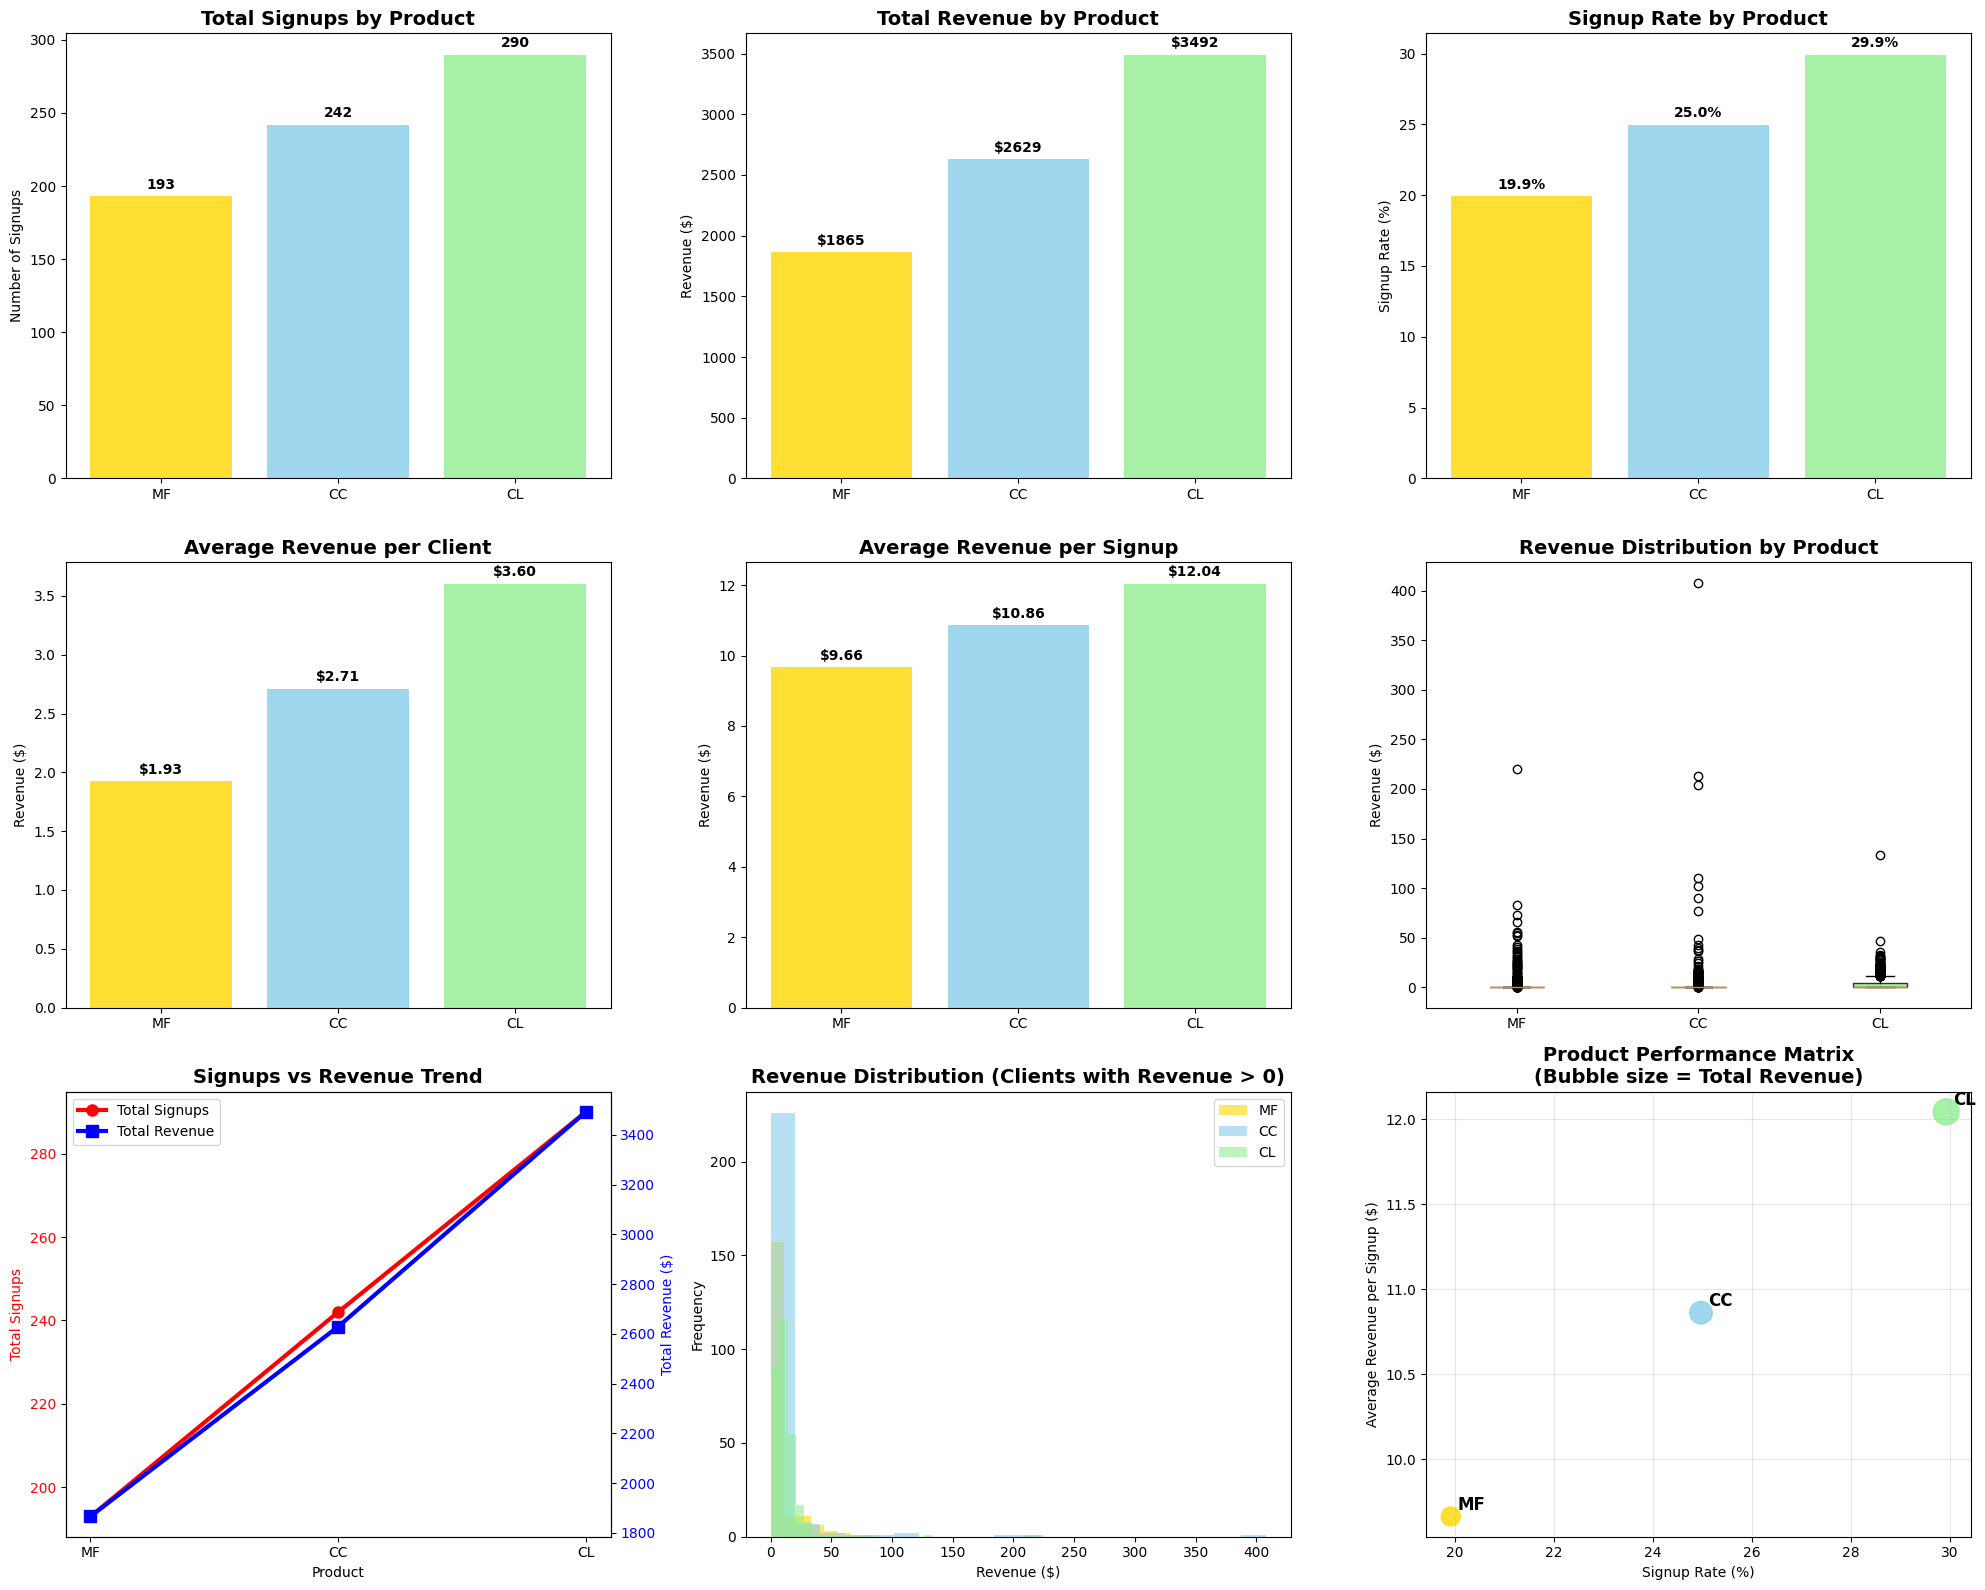


=== KEY INSIGHTS ===
🏆 Highest Signup Rate: CL (29.9%)
💰 Highest Total Revenue: CL ($3492.49)
💎 Highest Revenue per Signup: CL ($12.04)

=== PRODUCT RANKINGS ===
By Total Revenue:
  3. CL: $3492.49
  2. CC: $2628.73
  1. MF: $1865.34

By Signup Rate:
  3. CL: 29.9%
  2. CC: 25.0%
  1. MF: 19.9%

By Revenue per Signup:
  3. CL: $12.04
  2. CC: $10.86
  1. MF: $9.66


In [49]:
# Comprehensive analysis of Sale_MF, Sale_CC, Sale_CL products
print("=== PRODUCT SALES ANALYSIS: MF, CC, CL ===")

sales_df = datasets['Sales_Revenues']

# Calculate key metrics for each product
products = ['MF', 'CC', 'CL']
metrics_summary = []

for product in products:
    sale_col = f'Sale_{product}'
    revenue_col = f'Revenue_{product}'
    
    # Calculate metrics
    total_signups = sales_df[sale_col].sum()
    total_revenue = sales_df[revenue_col].sum()
    signup_rate = (sales_df[sale_col] > 0).sum() / len(sales_df) * 100
    avg_revenue_per_client = sales_df[revenue_col].mean()
    avg_revenue_per_signup = sales_df[sales_df[sale_col] > 0][revenue_col].mean() if total_signups > 0 else 0
    max_revenue = sales_df[revenue_col].max()
    
    metrics_summary.append({
        'Product': product,
        'Total_Signups': total_signups,
        'Total_Revenue': total_revenue,
        'Signup_Rate_%': signup_rate,
        'Avg_Revenue_Per_Client': avg_revenue_per_client,
        'Avg_Revenue_Per_Signup': avg_revenue_per_signup,
        'Max_Revenue': max_revenue
    })

metrics_df = pd.DataFrame(metrics_summary)
print("\nProduct Metrics Summary:")
print(metrics_df.to_string(index=False, float_format='%.2f'))

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 16))

# 1. Total Signups
ax1 = plt.subplot(3, 3, 1)
bars1 = ax1.bar(products, metrics_df['Total_Signups'], color=['gold', 'skyblue', 'lightgreen'], alpha=0.8)
ax1.set_title('Total Signups by Product', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Signups')
for i, v in enumerate(metrics_df['Total_Signups']):
    ax1.text(i, v + max(metrics_df['Total_Signups'])*0.01, str(int(v)), ha='center', va='bottom', fontweight='bold')

# 2. Total Revenue
ax2 = plt.subplot(3, 3, 2)
bars2 = ax2.bar(products, metrics_df['Total_Revenue'], color=['gold', 'skyblue', 'lightgreen'], alpha=0.8)
ax2.set_title('Total Revenue by Product', fontsize=14, fontweight='bold')
ax2.set_ylabel('Revenue ($)')
for i, v in enumerate(metrics_df['Total_Revenue']):
    ax2.text(i, v + max(metrics_df['Total_Revenue'])*0.01, f'${v:.0f}', ha='center', va='bottom', fontweight='bold')

# 3. Signup Rate (%)
ax3 = plt.subplot(3, 3, 3)
bars3 = ax3.bar(products, metrics_df['Signup_Rate_%'], color=['gold', 'skyblue', 'lightgreen'], alpha=0.8)
ax3.set_title('Signup Rate by Product', fontsize=14, fontweight='bold')
ax3.set_ylabel('Signup Rate (%)')
for i, v in enumerate(metrics_df['Signup_Rate_%']):
    ax3.text(i, v + max(metrics_df['Signup_Rate_%'])*0.01, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# 4. Average Revenue per Client
ax4 = plt.subplot(3, 3, 4)
bars4 = ax4.bar(products, metrics_df['Avg_Revenue_Per_Client'], color=['gold', 'skyblue', 'lightgreen'], alpha=0.8)
ax4.set_title('Average Revenue per Client', fontsize=14, fontweight='bold')
ax4.set_ylabel('Revenue ($)')
for i, v in enumerate(metrics_df['Avg_Revenue_Per_Client']):
    ax4.text(i, v + max(metrics_df['Avg_Revenue_Per_Client'])*0.01, f'${v:.2f}', ha='center', va='bottom', fontweight='bold')

# 5. Average Revenue per Signup
ax5 = plt.subplot(3, 3, 5)
bars5 = ax5.bar(products, metrics_df['Avg_Revenue_Per_Signup'], color=['gold', 'skyblue', 'lightgreen'], alpha=0.8)
ax5.set_title('Average Revenue per Signup', fontsize=14, fontweight='bold')
ax5.set_ylabel('Revenue ($)')
for i, v in enumerate(metrics_df['Avg_Revenue_Per_Signup']):
    ax5.text(i, v + max(metrics_df['Avg_Revenue_Per_Signup'])*0.01, f'${v:.2f}', ha='center', va='bottom', fontweight='bold')

# 6. Revenue Distribution (Box plots)
ax6 = plt.subplot(3, 3, 6)
revenue_data = [sales_df['Revenue_MF'], sales_df['Revenue_CC'], sales_df['Revenue_CL']]
box_plot = ax6.boxplot(revenue_data, labels=products, patch_artist=True)
colors = ['gold', 'skyblue', 'lightgreen']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)
ax6.set_title('Revenue Distribution by Product', fontsize=14, fontweight='bold')
ax6.set_ylabel('Revenue ($)')

# 7. Sales vs Revenue Scatter
ax7 = plt.subplot(3, 3, 7)
x_pos = range(len(products))
ax7_twin = ax7.twinx()

line1 = ax7.plot(x_pos, metrics_df['Total_Signups'], 'o-', color='red', linewidth=3, markersize=8, label='Total Signups')
line2 = ax7_twin.plot(x_pos, metrics_df['Total_Revenue'], 's-', color='blue', linewidth=3, markersize=8, label='Total Revenue')

ax7.set_xlabel('Product')
ax7.set_ylabel('Total Signups', color='red')
ax7_twin.set_ylabel('Total Revenue ($)', color='blue')
ax7.set_title('Signups vs Revenue Trend', fontsize=14, fontweight='bold')
ax7.set_xticks(x_pos)
ax7.set_xticklabels(products)
ax7.tick_params(axis='y', labelcolor='red')
ax7_twin.tick_params(axis='y', labelcolor='blue')

# Add legend
lines1, labels1 = ax7.get_legend_handles_labels()
lines2, labels2 = ax7_twin.get_legend_handles_labels()
ax7.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 8. Revenue per Client Histogram
ax8 = plt.subplot(3, 3, 8)
for i, product in enumerate(products):
    revenue_col = f'Revenue_{product}'
    revenue_data = sales_df[sales_df[revenue_col] > 0][revenue_col]
    ax8.hist(revenue_data, bins=20, alpha=0.6, label=f'{product}', color=colors[i])
ax8.set_title('Revenue Distribution (Clients with Revenue > 0)', fontsize=14, fontweight='bold')
ax8.set_xlabel('Revenue ($)')
ax8.set_ylabel('Frequency')
ax8.legend()

# 9. Product Performance Matrix
ax9 = plt.subplot(3, 3, 9)
performance_matrix = metrics_df[['Signup_Rate_%', 'Avg_Revenue_Per_Signup']].values
scatter = ax9.scatter(metrics_df['Signup_Rate_%'], metrics_df['Avg_Revenue_Per_Signup'], 
                     s=metrics_df['Total_Revenue']/10, c=colors, alpha=0.8)
for i, product in enumerate(products):
    ax9.annotate(product, (metrics_df['Signup_Rate_%'].iloc[i], metrics_df['Avg_Revenue_Per_Signup'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontweight='bold', fontsize=12)
ax9.set_xlabel('Signup Rate (%)')
ax9.set_ylabel('Average Revenue per Signup ($)')
ax9.set_title('Product Performance Matrix\n(Bubble size = Total Revenue)', fontsize=14, fontweight='bold')
ax9.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional insights
print(f"\n=== KEY INSIGHTS ===")
best_signup_rate = metrics_df.loc[metrics_df['Signup_Rate_%'].idxmax()]
best_revenue_total = metrics_df.loc[metrics_df['Total_Revenue'].idxmax()]
best_revenue_per_signup = metrics_df.loc[metrics_df['Avg_Revenue_Per_Signup'].idxmax()]

print(f"🏆 Highest Signup Rate: {best_signup_rate['Product']} ({best_signup_rate['Signup_Rate_%']:.1f}%)")
print(f"💰 Highest Total Revenue: {best_revenue_total['Product']} (${best_revenue_total['Total_Revenue']:.2f})")
print(f"💎 Highest Revenue per Signup: {best_revenue_per_signup['Product']} (${best_revenue_per_signup['Avg_Revenue_Per_Signup']:.2f})")

print(f"\n=== PRODUCT RANKINGS ===")
print("By Total Revenue:")
revenue_ranking = metrics_df.sort_values('Total_Revenue', ascending=False)
for i, row in revenue_ranking.iterrows():
    print(f"  {i+1}. {row['Product']}: ${row['Total_Revenue']:.2f}")

print("\nBy Signup Rate:")
signup_ranking = metrics_df.sort_values('Signup_Rate_%', ascending=False)
for i, row in signup_ranking.iterrows():
    print(f"  {i+1}. {row['Product']}: {row['Signup_Rate_%']:.1f}%")

print("\nBy Revenue per Signup:")
efficiency_ranking = metrics_df.sort_values('Avg_Revenue_Per_Signup', ascending=False)
for i, row in efficiency_ranking.iterrows():
    print(f"  {i+1}. {row['Product']}: ${row['Avg_Revenue_Per_Signup']:.2f}")



1. **Product combination patterns** - how customers actually buy products
2. **Complementarity matrix** - probability of buying product B given product A
3. **Lift analysis** - how much more likely customers are to cross-purchase
4. **Single product customers** - your lowest hanging fruit for cross-selling
5. **Opportunity ranking** - which cross-selling campaigns to prioritize
6. **Strategic recommendations** - actionable next steps

The **Cross-selling Lift Matrix** is one of the most powerful insights from your complementarity analysis! Let me break down what it tells us:

## **What is Lift?**
Lift measures **how much more likely** a customer is to buy Product B **given they already own Product A**, compared to the baseline probability.

**Formula**: `Lift = P(Product B | Product A) / P(Product B)`

## **How to Interpret Lift Scores:**

- **Lift = 1.0**: No effect (owning Product A doesn't change likelihood of buying Product B)
- **Lift > 1.0**: **Positive complementarity** (owning Product A increases likelihood of buying Product B)
- **Lift < 1.0**: **Negative complementarity** (owning Product A decreases likelihood of buying Product B)

## **What Your Lift Matrix Reveals:**

From your heatmap, here's what each cell tells you:

### **🔥 High Lift Opportunities (Lift > 2.0)**
- These are your **strongest cross-selling opportunities**
- Customers with Product A are **2x+ more likely** to buy Product B
- **Prioritize these combinations** for marketing campaigns

### **🎯 Moderate Lift Opportunities (Lift 1.5-2.0)**
- Good cross-selling potential
- Products have **natural synergy**
- Worth targeting but with lower priority

### **⚠️ Low/No Lift (Lift < 1.5)**
- Products are **independent** or competing
- Cross-selling may not be effective
- Focus resources elsewhere

## **Strategic Insights from Lift Matrix:**

1. **Product Synergies**: High lift reveals which products naturally complement each other
2. **Campaign Prioritization**: Target high-lift combinations first for better ROI
3. **Bundle Strategies**: High-lift pairs make good product bundles
4. **Customer Journey**: Shows natural progression paths between products
5. **Resource Allocation**: Avoid wasting marketing spend on low-lift combinations

## **Actionable Questions to Ask:**

- Which product pairs have the **highest lift scores**?
- Are there **asymmetric relationships** (A→B has high lift, but B→A doesn't)?
- Which products have **consistently high lift** across all targets?
- Are there **surprising low-lift combinations** that challenge assumptions?

The lift matrix essentially tells you **where to focus your cross-selling efforts** for maximum impact! 🎯

=== PRODUCT COMPLEMENTARITY & CROSS-SELLING ANALYSIS ===
Analyzing which products are bought together and identifying lowest hanging fruit
--------------------------------------------------------------------------------

=== PRODUCT COMBINATION PATTERNS ===
Product combination counts:
  No Products :  400 clients ( 41.3%)
  MF Only     :  106 clients ( 10.9%)
  CC Only     :  142 clients ( 14.7%)
  CL Only     :  179 clients ( 18.5%)
  MF + CC     :   31 clients (  3.2%)
  MF + CL     :   42 clients (  4.3%)
  CC + CL     :   55 clients (  5.7%)
  All Three   :   14 clients (  1.4%)

=== COMPLEMENTARITY ANALYSIS ===
Conditional Probabilities P(Product B | Product A):
       MF     CC     CL
MF  1.000  0.233  0.290
CC  0.186  1.000  0.285
CL  0.193  0.238  1.000

=== LIFT ANALYSIS ===
Lift Matrix (Conditional Prob / Baseline Prob):
      MF    CC    CL
MF  1.00  0.93  0.97
CC  0.93  1.00  0.95
CL  0.97  0.95  1.00

=== SINGLE PRODUCT CUSTOMERS (LOWEST HANGING FRUIT) ===
Single Product C

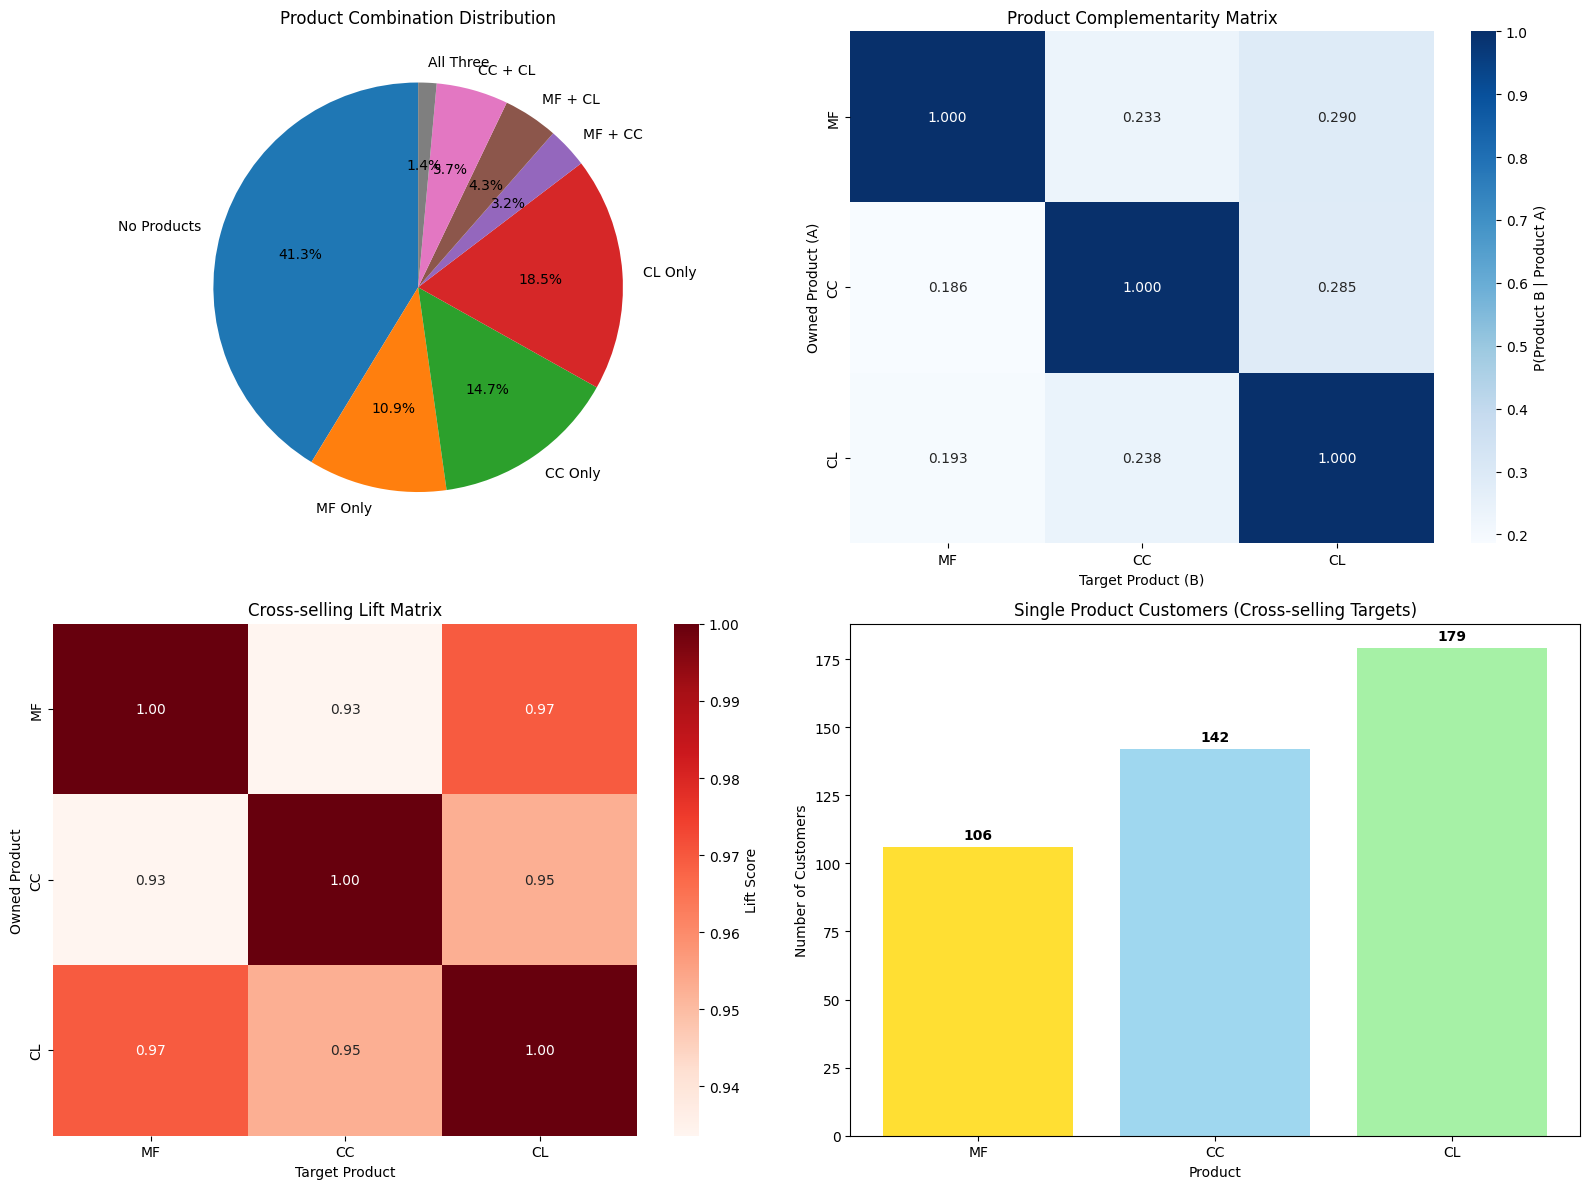


=== ACTIONABLE INSIGHTS & RECOMMENDATIONS ===
🎯 Most Common Single Product: CL (179 customers)
🚀 Highest Cross-selling Opportunity: CL → CC
   - Target: 179 customers
   - Conversion Probability: 23.8%
   - Lift Score: 0.95x
   - Potential Revenue: $462.63

📊 Product Complementarity Insights:
   6. CL → CC: 23.8% conversion, 0.95x lift
   5. CL → MF: 19.3% conversion, 0.97x lift
   4. CC → CL: 28.5% conversion, 0.95x lift

🆕 New Customer Acquisition Opportunity: 400 customers with no products

=== STRATEGIC RECOMMENDATIONS ===
1. 🥇 PRIORITY: Target CL-only customers for CC cross-selling
2. 🎯 FOCUS: 179 customers with 23.8% expected conversion
3. 💰 REVENUE: Potential $462.63 from top opportunity
4. 📈 ENTRY POINT: CL is the best single product for customer acquisition
5. 🔄 BUNDLE STRATEGY: Consider CL+CC product bundles


In [50]:
# PRODUCT COMPLEMENTARITY AND CROSS-SELLING ANALYSIS
print("=== PRODUCT COMPLEMENTARITY & CROSS-SELLING ANALYSIS ===")
print("Analyzing which products are bought together and identifying lowest hanging fruit")
print("-" * 80)

sales_df = datasets['Sales_Revenues']

# 1. CREATE PRODUCT COMBINATION MATRIX
print("\n=== PRODUCT COMBINATION PATTERNS ===")

# Create binary product ownership matrix
product_matrix = sales_df[['Client', 'Sale_MF', 'Sale_CC', 'Sale_CL']].copy()
product_matrix['Total_Products'] = product_matrix[['Sale_MF', 'Sale_CC', 'Sale_CL']].sum(axis=1)

# Analyze product combinations
combinations = {
    'No Products': len(product_matrix[product_matrix['Total_Products'] == 0]),
    'MF Only': len(product_matrix[(product_matrix['Sale_MF'] == 1) & (product_matrix['Total_Products'] == 1)]),
    'CC Only': len(product_matrix[(product_matrix['Sale_CC'] == 1) & (product_matrix['Total_Products'] == 1)]),
    'CL Only': len(product_matrix[(product_matrix['Sale_CL'] == 1) & (product_matrix['Total_Products'] == 1)]),
    'MF + CC': len(product_matrix[(product_matrix['Sale_MF'] == 1) & (product_matrix['Sale_CC'] == 1) & (product_matrix['Sale_CL'] == 0)]),
    'MF + CL': len(product_matrix[(product_matrix['Sale_MF'] == 1) & (product_matrix['Sale_CL'] == 1) & (product_matrix['Sale_CC'] == 0)]),
    'CC + CL': len(product_matrix[(product_matrix['Sale_CC'] == 1) & (product_matrix['Sale_CL'] == 1) & (product_matrix['Sale_MF'] == 0)]),
    'All Three': len(product_matrix[product_matrix['Total_Products'] == 3])
}

print("Product combination counts:")
for combo, count in combinations.items():
    pct = (count / len(sales_df)) * 100
    print(f"  {combo:12}: {count:4d} clients ({pct:5.1f}%)")

# 2. COMPLEMENTARITY ANALYSIS
print(f"\n=== COMPLEMENTARITY ANALYSIS ===")

# Calculate conditional probabilities
products = ['MF', 'CC', 'CL']
complementarity_matrix = pd.DataFrame(index=products, columns=products)

for prod1 in products:
    for prod2 in products:
        if prod1 != prod2:
            # P(Product2 | Product1) = P(Product1 AND Product2) / P(Product1)
            has_prod1 = sales_df[f'Sale_{prod1}'] == 1
            has_both = (sales_df[f'Sale_{prod1}'] == 1) & (sales_df[f'Sale_{prod2}'] == 1)
            
            if has_prod1.sum() > 0:
                conditional_prob = has_both.sum() / has_prod1.sum()
                complementarity_matrix.loc[prod1, prod2] = conditional_prob
            else:
                complementarity_matrix.loc[prod1, prod2] = 0
        else:
            complementarity_matrix.loc[prod1, prod2] = 1.0

complementarity_matrix = complementarity_matrix.astype(float)
print("Conditional Probabilities P(Product B | Product A):")
print(complementarity_matrix.round(3))

# 3. LIFT ANALYSIS (how much more likely to buy B given A)
print(f"\n=== LIFT ANALYSIS ===")
lift_matrix = pd.DataFrame(index=products, columns=products)

for prod1 in products:
    for prod2 in products:
        if prod1 != prod2:
            # Baseline probability of Product2
            baseline_prob = (sales_df[f'Sale_{prod2}'] == 1).sum() / len(sales_df)
            
            # Conditional probability
            conditional_prob = complementarity_matrix.loc[prod1, prod2]
            
            # Lift = Conditional / Baseline
            if baseline_prob > 0:
                lift = conditional_prob / baseline_prob
                lift_matrix.loc[prod1, prod2] = lift
            else:
                lift_matrix.loc[prod1, prod2] = 0
        else:
            lift_matrix.loc[prod1, prod2] = 1.0

lift_matrix = lift_matrix.astype(float)
print("Lift Matrix (Conditional Prob / Baseline Prob):")
print(lift_matrix.round(2))

# 4. SINGLE PRODUCT CUSTOMERS ANALYSIS
print(f"\n=== SINGLE PRODUCT CUSTOMERS (LOWEST HANGING FRUIT) ===")

single_product_customers = {}
single_product_revenue = {}

for product in products:
    # Customers who only have this product
    single_customers = product_matrix[(product_matrix[f'Sale_{product}'] == 1) & 
                                     (product_matrix['Total_Products'] == 1)]
    
    single_product_customers[product] = len(single_customers)
    
    # Calculate average revenue for these customers
    if len(single_customers) > 0:
        avg_revenue = sales_df[sales_df['Client'].isin(single_customers['Client'])][f'Revenue_{product}'].mean()
        single_product_revenue[product] = avg_revenue
    else:
        single_product_revenue[product] = 0

print("Single Product Customers (Cross-selling Opportunities):")
for product in products:
    count = single_product_customers[product]
    pct = (count / len(sales_df)) * 100
    avg_rev = single_product_revenue[product]
    print(f"  {product} Only: {count:4d} clients ({pct:5.1f}%) - Avg Revenue: ${avg_rev:.2f}")

# 5. CROSS-SELLING OPPORTUNITY MATRIX
print(f"\n=== CROSS-SELLING OPPORTUNITY RANKING ===")

cross_sell_opportunities = []

for prod1 in products:
    single_customers = single_product_customers[prod1]
    
    for prod2 in products:
        if prod1 != prod2:
            # Lift score
            lift_score = lift_matrix.loc[prod1, prod2]
            
            # Potential revenue from cross-selling
            avg_revenue_prod2 = sales_df[sales_df[f'Sale_{prod2}'] == 1][f'Revenue_{prod2}'].mean()
            potential_revenue = single_customers * avg_revenue_prod2 * complementarity_matrix.loc[prod1, prod2]
            
            cross_sell_opportunities.append({
                'From_Product': prod1,
                'To_Product': prod2,
                'Target_Customers': single_customers,
                'Conversion_Probability': complementarity_matrix.loc[prod1, prod2],
                'Lift_Score': lift_score,
                'Avg_Revenue_Target': avg_revenue_prod2,
                'Potential_Revenue': potential_revenue,
                'Opportunity_Score': single_customers * lift_score * avg_revenue_prod2
            })

cross_sell_df = pd.DataFrame(cross_sell_opportunities)
cross_sell_df = cross_sell_df.sort_values('Opportunity_Score', ascending=False)

print("Cross-selling Opportunities (Ranked by Opportunity Score):")
print(cross_sell_df[['From_Product', 'To_Product', 'Target_Customers', 'Conversion_Probability', 
                     'Lift_Score', 'Potential_Revenue']].round(3))

# 6. VISUALIZATION
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Product combinations pie chart
ax1.pie(combinations.values(), labels=combinations.keys(), autopct='%1.1f%%', startangle=90)
ax1.set_title('Product Combination Distribution')

# Complementarity heatmap
sns.heatmap(complementarity_matrix, annot=True, fmt='.3f', cmap='Blues', 
            ax=ax2, cbar_kws={'label': 'P(Product B | Product A)'})
ax2.set_title('Product Complementarity Matrix')
ax2.set_xlabel('Target Product (B)')
ax2.set_ylabel('Owned Product (A)')

# Lift heatmap
sns.heatmap(lift_matrix, annot=True, fmt='.2f', cmap='Reds', 
            ax=ax3, cbar_kws={'label': 'Lift Score'})
ax3.set_title('Cross-selling Lift Matrix')
ax3.set_xlabel('Target Product')
ax3.set_ylabel('Owned Product')

# Single product customers bar chart
single_counts = [single_product_customers[p] for p in products]
bars = ax4.bar(products, single_counts, color=['gold', 'skyblue', 'lightgreen'], alpha=0.8)
ax4.set_title('Single Product Customers (Cross-selling Targets)')
ax4.set_ylabel('Number of Customers')
ax4.set_xlabel('Product')

# Add value labels
for bar, count in zip(bars, single_counts):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(single_counts)*0.01,
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 7. ACTIONABLE INSIGHTS
print(f"\n=== ACTIONABLE INSIGHTS & RECOMMENDATIONS ===")

# Find the best single product entry point
best_single_product = max(single_product_customers.items(), key=lambda x: x[1])
print(f"🎯 Most Common Single Product: {best_single_product[0]} ({best_single_product[1]} customers)")

# Find highest lift combinations
best_lift = cross_sell_df.iloc[0]
print(f"🚀 Highest Cross-selling Opportunity: {best_lift['From_Product']} → {best_lift['To_Product']}")
print(f"   - Target: {best_lift['Target_Customers']} customers")
print(f"   - Conversion Probability: {best_lift['Conversion_Probability']:.1%}")
print(f"   - Lift Score: {best_lift['Lift_Score']:.2f}x")
print(f"   - Potential Revenue: ${best_lift['Potential_Revenue']:.2f}")

# Most complementary products
print(f"\n📊 Product Complementarity Insights:")
for i, row in cross_sell_df.head(3).iterrows():
    print(f"   {i+1}. {row['From_Product']} → {row['To_Product']}: "
          f"{row['Conversion_Probability']:.1%} conversion, {row['Lift_Score']:.2f}x lift")

# No product customers (acquisition opportunity)
no_product_customers = combinations['No Products']
print(f"\n🆕 New Customer Acquisition Opportunity: {no_product_customers} customers with no products")

print(f"\n=== STRATEGIC RECOMMENDATIONS ===")
print(f"1. 🥇 PRIORITY: Target {best_single_product[0]}-only customers for {cross_sell_df.iloc[0]['To_Product']} cross-selling")
print(f"2. 🎯 FOCUS: {cross_sell_df.iloc[0]['Target_Customers']} customers with {cross_sell_df.iloc[0]['Conversion_Probability']:.1%} expected conversion")
print(f"3. 💰 REVENUE: Potential ${cross_sell_df.iloc[0]['Potential_Revenue']:.2f} from top opportunity")
print(f"4. 📈 ENTRY POINT: {best_single_product[0]} is the best single product for customer acquisition")
print(f"5. 🔄 BUNDLE STRATEGY: Consider {best_single_product[0]}+{cross_sell_df.iloc[0]['To_Product']} product bundles")